In [8]:
import pickle
from librarybantuan.plot import feature_importance
from model import Linear_QNet
import matplotlib.pyplot as plt
import numpy as np


In [9]:
visual_range = 21
epsilon_rate = 0.5
title = f"vr={visual_range}, eps={epsilon_rate if epsilon_rate<100 else 'no_eps'} Feature Importances"
title

'vr=21, eps=0.5 Feature Importances'

In [10]:
model = Linear_QNet(input_size=visual_range**2+5, hidden_size=128, output_size=3)
model.load()

In [11]:
memory = list(pickle.load(open('./model/memory.mem', 'rb')))
states, actions, rewards, next_states, game_overs = zip(*memory)

len(memory)

5000

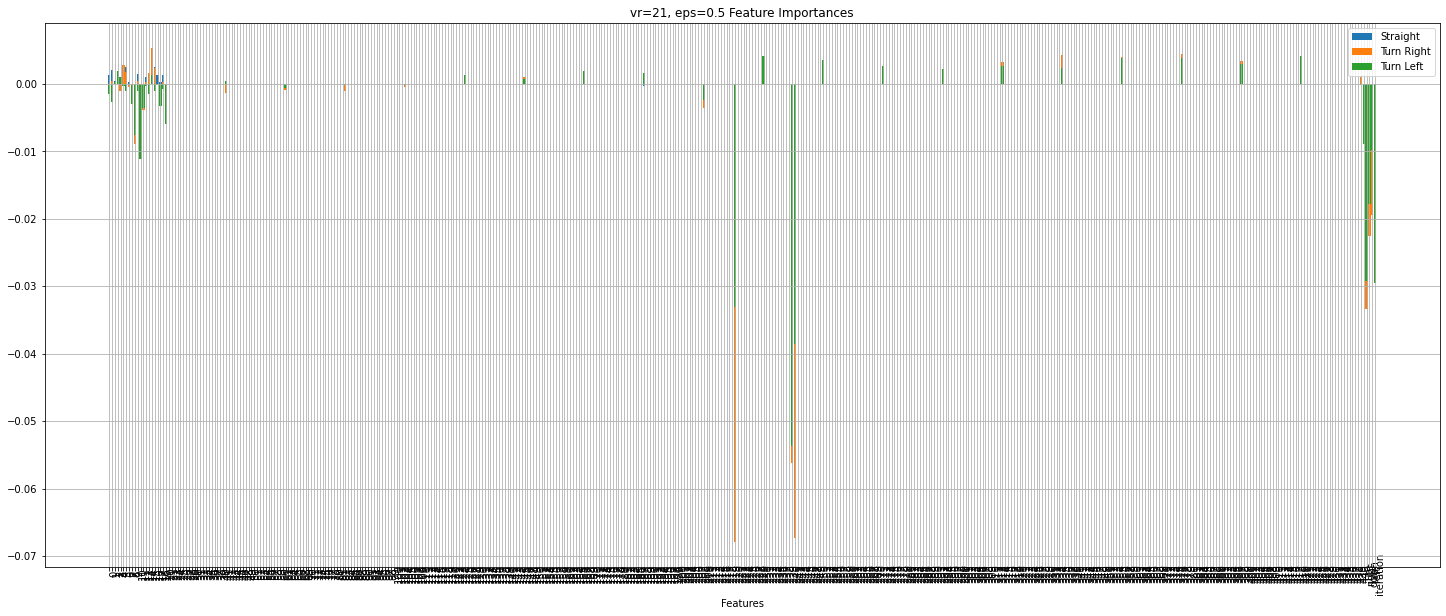

In [12]:
feature_names = list(np.arange(visual_range**2)) + ['up', 'right', 'down', 'left', 'iteration']
x_pos = (np.arange(len(feature_names)))
plt.figure(figsize=(25, 10))
plt.title(title)
plt.xlabel("Features")
plt.xticks(x_pos, feature_names, wrap=True, rotation=90)

label = ['Straight', 'Turn Right', 'Turn Left']
for target in range(3):
    feature_importance(visual_range, model, states[-1000:], x_pos, target=target, label=label[target])

plt.legend()
plt.show()

100 data = 1.7s <br>
1000 data = 1m 14.3s <br>
5286 data = 